# Цель проекта

Проанализировать выручку от тарифов компании «Мегалайн» за 2018 год на выборке из 500 клиентов и протестировать две гипотезы:
- средняя выручка от пользователей тарифов Ultra и Smart различается;
- средняя выручка от пользователей из Москвы отличается от выручки от пользователей из других регионов.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span>
            <ul class="toc-item">
                <li><span><a href="#Тарифы" data-toc-modified-id="Тарифы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Тарифы</a></span></li>
                <li><span><a href="#Пользователи" data-toc-modified-id="Пользователи-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Пользователи</a></span></li>
                <li><span><a href="#Звонки" data-toc-modified-id="Звонки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Звонки</a></span></li>
                <li><span><a href="#Сообщения" data-toc-modified-id="Сообщения-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Сообщения</a></span></li>
                <li><span><a href="#Интернет" data-toc-modified-id="Интернет-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Интернет</a></span></li>
            </ul></li>
        <li><span><a href="#Агрегация-по-пользователям-и-месяцам" data-toc-modified-id="Агрегация-по-пользователям-и-месяцам-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Агрегация по пользователям и месяцам</a></span></li>
        <li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span>
            <ul class="toc-item">
                <li><span><a href="#Звонки" data-toc-modified-id="Звонки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Звонки</a></span></li>
                <li><span><a href="#СМС" data-toc-modified-id="СМС-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>СМС</a></span></li>
                <li><span><a href="#Интернет" data-toc-modified-id="Интернет-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Интернет</a></span></li>
                <li><span><a href="#Расходы" data-toc-modified-id="Расходы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Расходы</a></span></li>
            </ul>
        </li>
        <li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span>
            <ul class="toc-item">
                <li><span><a href="#Smart-vs.-Ultra" data-toc-modified-id="Smart-vs.-Ultra-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Smart vs. Ultra</a></span></li>
                <li><span><a href="#Moscow-vs.-Rest" data-toc-modified-id="Moscow-vs.-Rest-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Moscow vs. Rest</a></span></li>
            </ul>
        </li>
        <li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li>
    </ul>
</div>

## Предобработка данных

Подключим необходимые модули и выставим полезные умолчания.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt
import scipy.stats as st

pd.set_option('display.max_columns', None); # снятие ограничения на число выводимых столбцов
plt.style.use('dark_background'); # темный фон графиков
plt.rc('axes', grid=True, axisbelow=True); # линии сетки позади графика

In [2]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

Загрузим каждую таблицу в отдельный датафрейм.

In [3]:
trf = pd.read_csv('/datasets/tariffs.csv')

In [4]:
usr = pd.read_csv('/datasets/users.csv')

In [5]:
cls = pd.read_csv('/datasets/calls.csv')

In [6]:
msg = pd.read_csv('/datasets/messages.csv')

In [7]:
www = pd.read_csv('/datasets/internet.csv')

Проанализируем какждую таблицу отдельно.

### Тарифы

In [8]:
trf

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Даункастим все числовые столбцы в беззнаковые целочисленные, а столбец с названием тарифа преобразуем к категориальному типу.

In [10]:
ints = trf.select_dtypes(include=['int']).apply(pd.to_numeric, downcast='unsigned') 
trf[ints.columns] = ints
trf['tariff_name'] = trf['tariff_name'].astype('category')

In [11]:
trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   messages_included      2 non-null      uint16  
 1   mb_per_month_included  2 non-null      uint16  
 2   minutes_included       2 non-null      uint16  
 3   rub_monthly_fee        2 non-null      uint16  
 4   rub_per_gb             2 non-null      uint8   
 5   rub_per_message        2 non-null      uint8   
 6   rub_per_minute         2 non-null      uint8   
 7   tariff_name            2 non-null      category
dtypes: category(1), uint16(4), uint8(3)
memory usage: 276.0 bytes


### Пользователи

In [12]:
usr

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [13]:
usr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пользователей, действительно, пятьсот. Проверим, что в таблице нет полных дублей.

In [14]:
usr.duplicated(usr.columns[1:]).sum()

0

Дублей нет.

Посмотрим на распределение возрастов.

In [15]:
usr.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


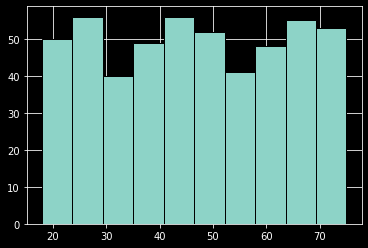

In [16]:
usr['age'].hist(bins=10, edgecolor='k');

Диапазон адекватный, распределение более-менее равномерное, что не очень реалистично.

Приведем столбец с датой подключения к типу `datetime` и посмотрим на распределение числа подключений по месяцам.

In [17]:
usr['reg_date'] = pd.to_datetime(usr['reg_date'])

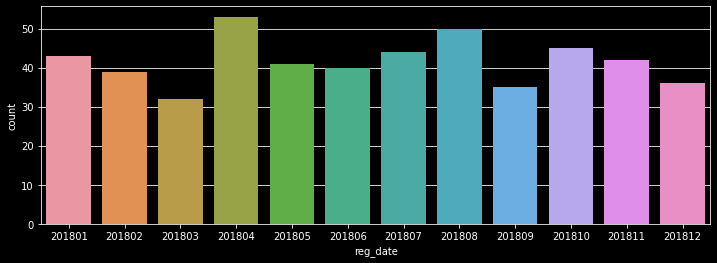

In [18]:
plt.figure(figsize=(12, 4))
sns.countplot(100*usr['reg_date'].dt.year + usr['reg_date'].dt.month);

Распределение более-менее равномерное в течение всего 2018 года. Похоже, анализировать придется поведение за 2018 год пользователей, подключившихся *в этом же году*. Выборка становится все более странной.

Повторим проделанное с датой отключения.

In [19]:
usr['churn_date'] = pd.to_datetime(usr['churn_date'])

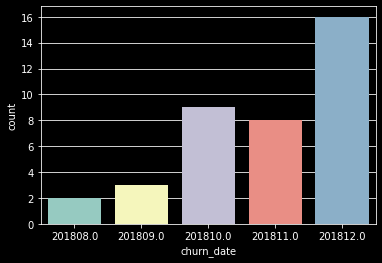

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(100*usr['churn_date'].dt.year + usr['churn_date'].dt.month);

Отключаться пользователи начали в августе. До декабря число отключений сильно росло, по всей видимости, просто из-за роста числа самих пользователей.

Проверим, везде ли дата отключения превышает дату подключения.

In [21]:
usr.query("churn_date <= reg_date")

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


Здесь несостыковок нет.

Наконец, посмотрим на динамику числа активных пользователей.
<a id='active_users'></a>

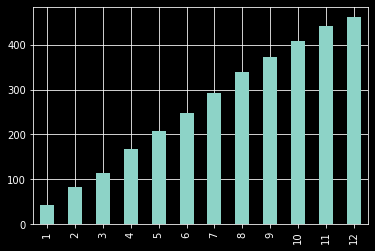

In [22]:
(
    # из числа подключившихся пользователей по месяцам
    usr.groupby(usr['reg_date'].dt.month)['reg_date'].count() 
    # вычитаем число отключившихся
    .add(-usr.groupby(usr['churn_date'].dt.month)['churn_date'].count(), fill_value=0) 
    # и выводим накопленным итогом
    .cumsum().plot(kind='bar') 
);

Как и ожидалось, число активных пользователей стремительно растет в течение года. Необходимо будет учитывать это при дальнейшем анализе.

Посмотрим на распределение пользоватетей по тарифам.

In [23]:
usr['tariff'].value_counts(dropna=False)

smart    351
ultra    149
Name: tariff, dtype: int64

Пользователей тарифа Smart вдвое больше, чем пользователей тарифа Ultra, что ожидаемо, учитывая премиальность последнего.

Посмотрим на распределение пользователей по городам.

In [24]:
usr['city'].value_counts(dropna=False)

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Архангельск         1
Подольск            1
Химки               1
Нижневартовск       1
Иваново             1
Name: city, Length: 76, dtype: int64

Никаких сюрпризов: почти треть пользователей из Москвы и Санкт-Петербурга.

Посмотрим на распределение по именам и фамилиям.

In [25]:
usr['first_name'].value_counts(dropna=False)

Радим      6
Пётр       5
Леонид     5
Артём      4
Клавдия    4
          ..
Максим     1
Камилла    1
Мадина     1
Сабина     1
Анита      1
Name: first_name, Length: 246, dtype: int64

In [26]:
usr['last_name'].value_counts(dropna=False)

Андреенко     5
Озерова       3
Анищенко      3
Аркадьев      3
Березина      3
             ..
Алексеичев    1
Устинова      1
Карташова     1
Измайлова     1
Ковалева      1
Name: last_name, Length: 419, dtype: int64

Подозрительно высокая вариативность имен. Их частотность тоже странная (слишком равномерная). Спишем это на не очень реалистичную генерацию имен для проекта.

Даункастим все числовые столбцы в беззнаковые целочисленные, столбцы с названием тарифа и города преобразуем к категориальному типу.

In [27]:
ints = usr.select_dtypes(include=['int']).apply(pd.to_numeric, downcast='unsigned') 
usr[ints.columns] = ints
usr['tariff'] = usr['tariff'].astype('category')
usr['city'] = usr['city'].astype('category')

In [28]:
usr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    uint16        
 1   age         500 non-null    uint8         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    category      
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    category      
dtypes: category(2), datetime64[ns](2), object(2), uint16(1), uint8(1)
memory usage: 21.0+ KB


### Звонки

In [29]:
cls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [30]:
cls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Проверим таблицу на наличие полных дублей.

In [31]:
cls.duplicated().sum()

0

Дублей нет.

Приведем дату звонка к типу `datetime`, продолжительность звонка – к минимальному типу `float`, а id пользователя – к минимальному беззнаковому целочисленному типу.

In [32]:
cls['call_date'] = pd.to_datetime(cls['call_date'])

In [33]:
cls['duration'] = pd.to_numeric(cls['duration'], downcast='float')

In [34]:
cls['user_id'] = pd.to_numeric(cls['user_id'], downcast='unsigned')

Посмотрим, все ли 500 пользователей из таблицы `usr` есть в таблице `cls`.

In [35]:
pd.Series(cls['user_id'].unique())

0      1000
1      1001
2      1002
3      1003
4      1004
       ... 
487    1495
488    1496
489    1497
490    1498
491    1499
Length: 492, dtype: uint16

Восьмерых нет. Видимо, они не звонят.

Проверим таблицы `cls` и `usr` на согласованность: нет ли звонков в дни, когда пользователь был неактивен.

In [36]:
(
    # для каждого пользователя считаем даты первого и последнего звонка
    cls.groupby('user_id').agg(min_date=('call_date', 'min'), max_date=('call_date', 'max'))
    # джойним таблицу пользователей
    .join(usr.set_index('user_id'))
    # выводим пользователей, которые звонили, будучи неподключенными
    .query("min_date < reg_date or max_date < reg_date or min_date > churn_date or max_date > churn_date")
)

,min_date,max_date,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,,,


Несогласованностей нет.

Посмотрим, как по месяцам распределено число звонков.

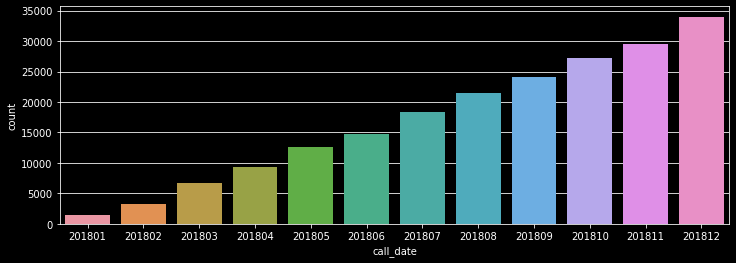

In [37]:
plt.figure(figsize=(12, 4))
sns.countplot(100*cls['call_date'].dt.year + cls['call_date'].dt.month);

Число звонков стремительно растет. Но, помня, что не менее стремительно растет и [число активных пользоватетей](#active_users), посмотрим на динамику среднего числа звонков на одного пользователя.

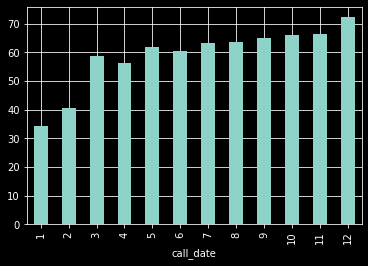

In [38]:
(
    cls.groupby(cls['call_date'].dt.month)['id'].count() # число звонков помесячно
    / cls.groupby(cls['call_date'].dt.month)['user_id'].nunique() # делим на число звонивших пользователей
).plot(kind='bar');

В среднем два звонка в день б*о*льшую часть года с небольшой положительной динамикой – реалистично. 

Посмотрим на распределение продолжительности звонка.

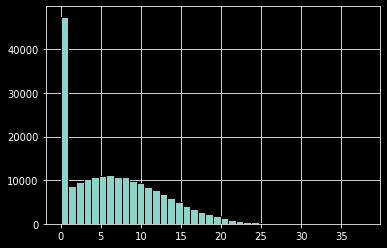

In [39]:
cls['duration'].hist(bins=40, edgecolor='k');

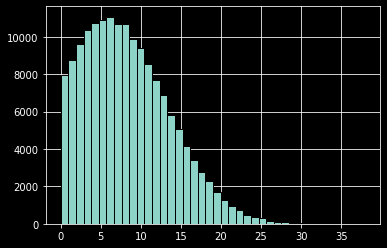

In [40]:
cls.query("duration != 0")['duration'].hist(bins=40, edgecolor='k');

In [41]:
cls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Если не считать звонков с нулевой продолжительностью (пропущенные), распределение очень похоже на обрезанное нормальное с модой около шести минут. Вместе с пропущенными звонками средняя продолжительность около семи минут. Многовато, но будем считать, что похоже на правду.

Посчитаем среднюю продолжительность звонка по месяцам.

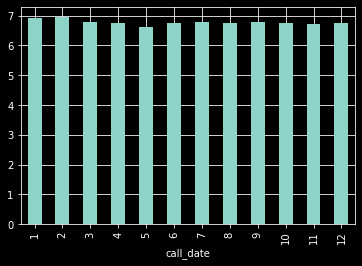

In [42]:
(
    cls.groupby(cls['call_date'].dt.month)['duration'].sum() # суммарную продолжительность помесячно
    / cls.groupby(cls['call_date'].dt.month)['id'].count() # делим на число звонков 
).plot(kind='bar');

Просто нечеловеческая стабильность. 

### Сообщения

In [43]:
msg

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [44]:
msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Проверим таблицу на наличие полных дублей.

In [45]:
msg.duplicated().sum()

0

Дублей нет.

Приведем дату сообщения к типу `datetime`, а id пользователя – к минимальному беззнаковому целочисленному типу.

In [46]:
msg['message_date'] = pd.to_datetime(msg['message_date'])

In [47]:
msg['user_id'] = pd.to_numeric(msg['user_id'], downcast='unsigned')

Посмотрим, все ли 500 пользователей из таблицы `usr` есть в таблице `msg`.

In [48]:
pd.Series(msg['user_id'].unique())

0      1000
1      1002
2      1003
3      1004
4      1005
       ... 
421    1495
422    1496
423    1497
424    1498
425    1499
Length: 426, dtype: uint16

Похоже, что 74 пользователя не пишут СМС.

Проверим таблицы `msg` и `usr` на согласованность: нет ли СМС в дни, когда пользователь был неактивен.

In [49]:
(
    # для каждого пользователя считаем даты первой и последней СМС
    msg.groupby('user_id').agg(min_date=('message_date', 'min'), max_date=('message_date', 'max'))
    # джойним таблицу пользователей
    .join(usr.set_index('user_id'))
    # выводим пользователей, которые СМСили, будучи неподключенными
    .query("min_date < reg_date or max_date < reg_date or min_date > churn_date or max_date > churn_date")
)

,min_date,max_date,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,,,


Несогласованностей нет.

Посмотрим, как по месяцам распределено число сообщений.

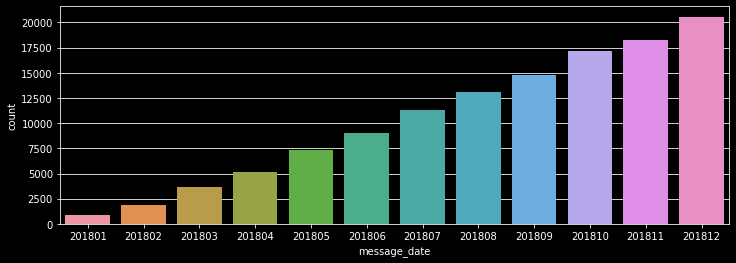

In [50]:
plt.figure(figsize=(12, 4))
sns.countplot(100*msg['message_date'].dt.year + msg['message_date'].dt.month);

Число СМС стремительно растет. Но, снова вспомнив [динамику числа активных пользоватетей](#active_users), посмотрим лучше на динамику среднего числа СМС на одного пользователя.

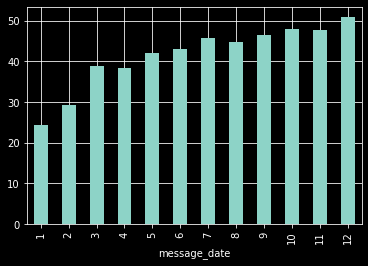

In [51]:
(
    msg.groupby(msg['message_date'].dt.month)['id'].count() # число СМС помесячно
    / msg.groupby(msg['message_date'].dt.month)['user_id'].nunique() # делим на число СМСящих пользователей
).plot(kind='bar');

В среднем полтора сообщения в день с небольшой положительной динамикой в течение года – снова реалистично.

### Интернет

In [52]:
www

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [53]:
www.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Удалим дублирующий индекс столбец.

In [54]:
www = www.drop('Unnamed: 0', axis=1)

Проверим таблицу на наличие полных дублей.

In [55]:
www.duplicated().sum()

0

Дублей нет.

Приведем дату сессии к типу `datetime`, объем трафика – к минимальному типу `float`, а id пользователя – к минимальному беззнаковому целочисленному типу.

In [56]:
www['session_date'] = pd.to_datetime(www['session_date'])

In [57]:
www['mb_used'] = pd.to_numeric(www['mb_used'], downcast='float')

In [58]:
www['user_id'] = pd.to_numeric(www['user_id'], downcast='unsigned')

Посмотрим, все ли 500 пользователей из таблицы `usr` есть в таблице `www`.

In [59]:
pd.Series(www['user_id'].unique())

0      1000
1      1001
2      1002
3      1003
4      1004
       ... 
492    1495
493    1496
494    1497
495    1498
496    1499
Length: 497, dtype: uint16

Не хватает всего троих, не пользующихся мобильным интернетом.

Проверим таблицы `www` и `usr` на согласованность: нет ли сессий в дни, когда пользователь был неактивен.

In [60]:
(
    # для каждого пользователя считаем даты первой и последней сессии
    www.groupby('user_id').agg(min_date=('session_date', 'min'), max_date=('session_date', 'max'))
    # джойним таблицу пользователей
    .join(usr.set_index('user_id'))
    # выводим пользователей, которые серфили, будучи неподключенными
    .query("min_date < reg_date or max_date < reg_date or min_date > churn_date or max_date > churn_date")
)

,min_date,max_date,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,,,


Несогласованностей нет.

Посмотрим, как по месяцам распределено число сессий.

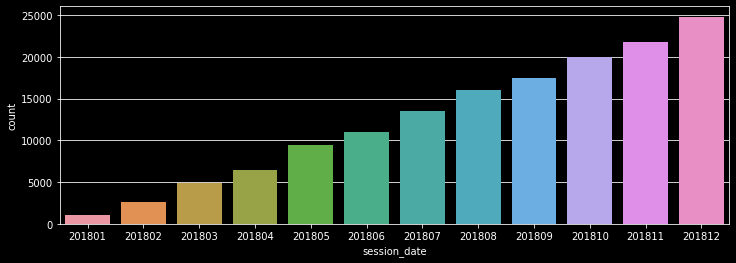

In [61]:
plt.figure(figsize=(12, 4))
sns.countplot(100*www['session_date'].dt.year + www['session_date'].dt.month);

Число сессий, ожидаемо, бодро растет из-за роста [числа активных пользоватетей](#active_users). Посмотрим на динамику среднего числа сессий на одного пользователя.

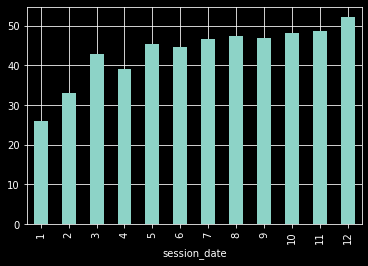

In [62]:
(
    www.groupby(www['session_date'].dt.month)['id'].count() # число сессий помесячно
    / www.groupby(www['session_date'].dt.month)['user_id'].nunique() # делим на число выходивших в интернет пользователей
).plot(kind='bar');

До боли знакомый график: в среднем полторы сессии в день с небольшой положительной динамикой в течение года, ровно как и у числа СМС – не очень реалистично. 

Посмотрим на распределение объема трафика.

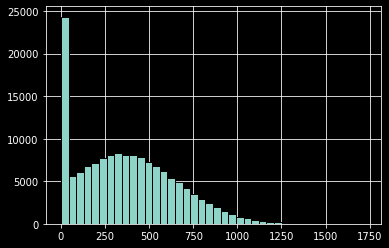

In [63]:
www['mb_used'].hist(bins=40, edgecolor='k');

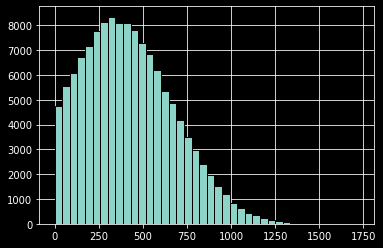

In [64]:
www.query("mb_used != 0")['mb_used'].hist(bins=40, edgecolor='k');

In [65]:
www['mb_used'].describe()

count    149396.000000
mean        370.192444
std         278.300964
min           0.000000
25%         138.187496
50%         348.014999
75%         559.552490
max        1724.829956
Name: mb_used, dtype: float64

И снова знакомый график (привет авторам проекта :) Если не считать сессий с нулевым трафиком (неудачные подключения?), распределение, как и в случае длительности звонков, очень похоже на обрезанное нормальное, но на этот раз с модой около трехсот мегабайт. Вместе с нулевыми сессиями средний трафик сессии около 370 Мб. Опять многовато.

Посчитаем средний трафик сессии по месяцам.

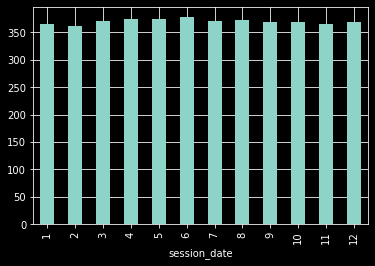

In [66]:
(
    www.groupby(www['session_date'].dt.month)['mb_used'].sum() # суммарный трафик помесячно
    / www.groupby(www['session_date'].dt.month)['id'].count() # делим на число сессий 
).plot(kind='bar');

И снова просто нечеловеческая стабильность :). 

## Агрегация по пользователям и месяцам

Для каждого пользователя посчитаем ежемесячное число звонков и количество израсходованных минут.

In [67]:
cls_um = ( # um = by user and month  
    cls.groupby(['user_id', cls['call_date'].dt.month]) # группируем по пользователю и месяцу
    .agg(calls=('id', 'count'), # считаем число звонков
         minutes=('duration', lambda x: x.apply(np.ceil).sum())) # и количество округленных вверх минут
    .rename_axis(index={'call_date': 'month'}) # переименовываем индекс
    .apply(pd.to_numeric, downcast='unsigned') # даункастим результат
)
cls_um

calls  minutes
user_id month                
1000    5         22      159
        6         43      172
        7         47      340
        8         52      408
        9         58      466
...              ...      ...
1498    10        41      247
1499    9          9       70
        10        68      449
        11        74      612
        12        69      492

[3174 rows x 2 columns]

Теперь посчитаем ежемесячное число СМС для каждого пользователя.

In [68]:
msg_um = (
    msg.groupby(['user_id', msg['message_date'].dt.month]) # группируем по пользователю и месяцу
    .agg(messages=('id', 'count')) # считаем количество СМС
    .rename_axis(index={'message_date': 'month'}) # переименовываем индекс
    .apply(pd.to_numeric, downcast='unsigned') # даункастим результат
)
msg_um

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

Наконец, для каждого пользователя посчитаем объем израсходованного трафика в месяц.

In [69]:
www_um = (
    www.groupby(['user_id', www['session_date'].dt.month]) # группируем по пользователю и месяцу
    .agg(gb=('mb_used', lambda x: np.ceil(x.sum()/1024))) # округляем суммарный трафик вверх до Гб
    .rename_axis(index={'session_date': 'month'}) # переименовываем индекс
    .apply(pd.to_numeric, downcast='unsigned') # даункастим результат
)
www_um

gb
user_id month    
1000    5       3
        6      23
        7      14
        8      14
        9      15
...            ..
1498    10     21
1499    9       2
        10     18
        11     18
        12     13

[3203 rows x 1 columns]

Теперь соберем все три промежуточные таблицы в одну.

In [70]:
um = ( # um = user_month
    cls_um.join([msg_um, www_um], how='outer') # соединяем три таблицы внешним джойном 
    .fillna(0) # пропуски заполняем нулями (месяцы, в которых не пользовались звонками, СМС или интернетом)
    .reset_index() # превращаем индекс в столбцы
    .apply(pd.to_numeric, downcast='unsigned') # даункастим результат
)

In [71]:
um

,user_id,month,calls,minutes,messages,gb
0,1000,5,22,159,22,3
1,1000,6,43,172,60,23
2,1000,7,47,340,75,14
3,1000,8,52,408,81,14
4,1000,9,58,466,57,15
...,...,...,...,...,...,...
3209,1498,10,41,247,42,21
3210,1499,9,9,70,11,2
3211,1499,10,68,449,48,18
3212,1499,11,74,612,59,18


Для проверки одним глазком взглянем на распределения.

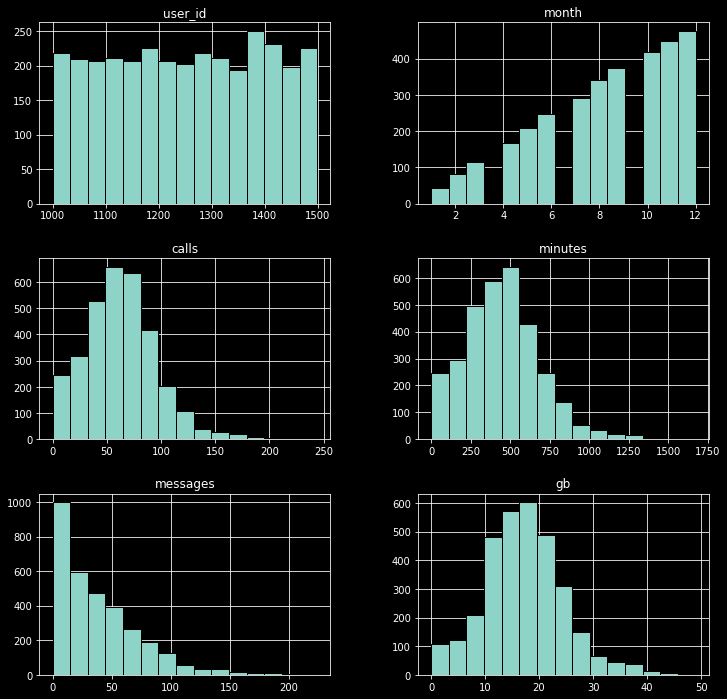

In [72]:
um.hist(bins=15, edgecolor='k', figsize=(12, 12));

Вроде бы ничего криминального.

Теперь добавим к последней таблице параметры тарифа из `trf` для расчета выручки и город из `usr` для последующего анализа.

In [73]:
um = (um
      .merge(usr, on='user_id', how='left')[list(um.columns) + ['tariff', 'city']] # джойним тариф и город из usr
      .merge(trf.rename(columns={'tariff_name': 'tariff'}), on='tariff', how='left') # джойним параметры тарифа из trf
)

In [74]:
um

,user_id,month,calls,minutes,messages,gb,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159,22,3,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,43,172,60,23,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,47,340,75,14,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,52,408,81,14,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,58,466,57,15,ultra,Краснодар,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41,247,42,21,smart,Владикавказ,50,15360,500,550,200,3,3
3210,1499,9,9,70,11,2,smart,Пермь,50,15360,500,550,200,3,3
3211,1499,10,68,449,48,18,smart,Пермь,50,15360,500,550,200,3,3
3212,1499,11,74,612,59,18,smart,Пермь,50,15360,500,550,200,3,3


Все готово для расчета выручки.

In [75]:
um['rub'] = pd.to_numeric(
    um['rub_monthly_fee'] # абонентская плата
    + um['rub_per_minute'] * (0.0 + um['minutes'] - um['minutes_included']).clip(0) # стоимость минут сверх пакета
    + um['rub_per_message'] * (0.0 + um['messages'] - um['messages_included']).clip(0) # стоимость СМС сверх пакета
    + um['rub_per_gb'] * (0.0 + um['gb'] - um['mb_per_month_included'] // 1024).clip(0), # стоимость Гб сверх пакета
    downcast='unsigned') # даункаст результата

Удалим не нужные больше параметры тарифа.

In [76]:
um = um.drop(columns=trf.columns, errors='ignore')

In [77]:
um

,user_id,month,calls,minutes,messages,gb,tariff,city,rub
0,1000,5,22,159,22,3,ultra,Краснодар,1950
1,1000,6,43,172,60,23,ultra,Краснодар,1950
2,1000,7,47,340,75,14,ultra,Краснодар,1950
3,1000,8,52,408,81,14,ultra,Краснодар,1950
4,1000,9,58,466,57,15,ultra,Краснодар,1950
...,...,...,...,...,...,...,...,...,...
3209,1498,10,41,247,42,21,smart,Владикавказ,1750
3210,1499,9,9,70,11,2,smart,Пермь,550
3211,1499,10,68,449,48,18,smart,Пермь,1150
3212,1499,11,74,612,59,18,smart,Пермь,1513


In [78]:
um.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   user_id   3214 non-null   uint16  
 1   month     3214 non-null   uint8   
 2   calls     3214 non-null   uint8   
 3   minutes   3214 non-null   uint16  
 4   messages  3214 non-null   uint8   
 5   gb        3214 non-null   uint8   
 6   tariff    3214 non-null   category
 7   city      3214 non-null   category
 8   rub       3214 non-null   uint16  
dtypes: category(2), uint16(3), uint8(4)
memory usage: 65.5 KB


## Анализ данных

Сохраним в отдельные датафреймы агрегированные результаты по каждому тарифу.

In [79]:
um_smart = um.query("tariff == 'smart'")
um_ultra = um.query("tariff == 'ultra'")

Сравним распределение значений и статистические характеристики показателей каждого тарифа.

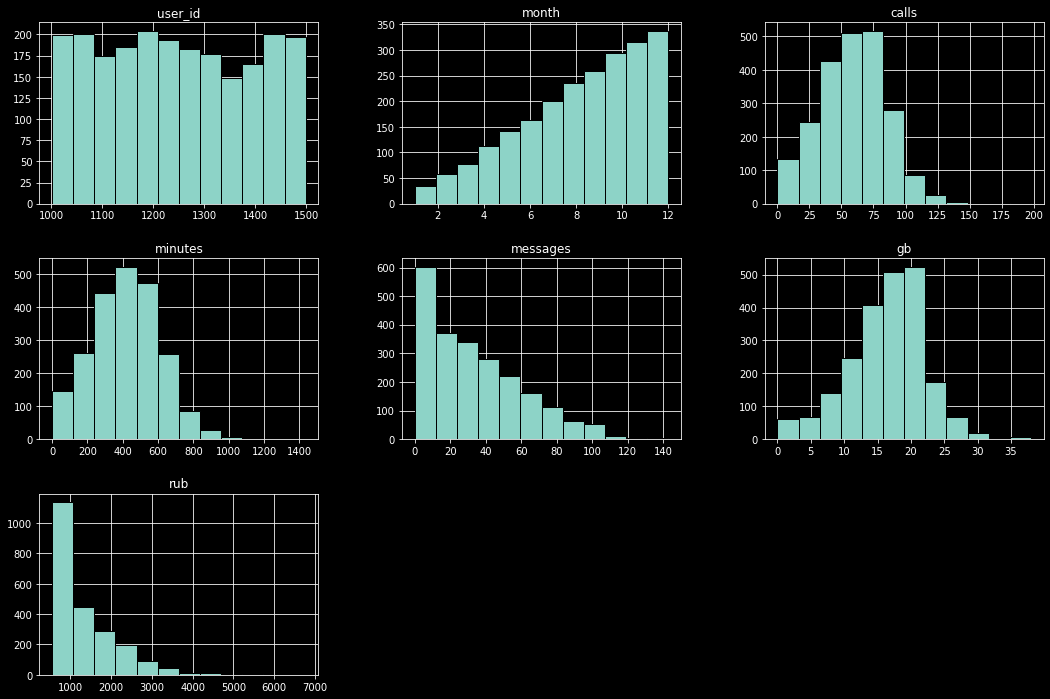

In [80]:
um_smart.hist(bins=12, edgecolor='k', figsize=(18, 12));

In [81]:
um_smart.describe()

,user_id,month,calls,minutes,messages,gb,rub
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,8.346792,58.463437,417.934948,33.384029,16.328847,1289.973531
std,146.119496,2.920316,25.939858,190.313730,28.227876,5.747061,818.404367
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,40.000000,282.000000,10.000000,13.000000,550.000000
50%,1239.000000,9.000000,60.000000,422.000000,28.000000,17.000000,1023.000000
75%,1376.000000,11.000000,76.000000,545.000000,51.000000,20.000000,1750.000000
max,1499.000000,12.000000,198.000000,1435.000000,143.000000,38.000000,6770.000000


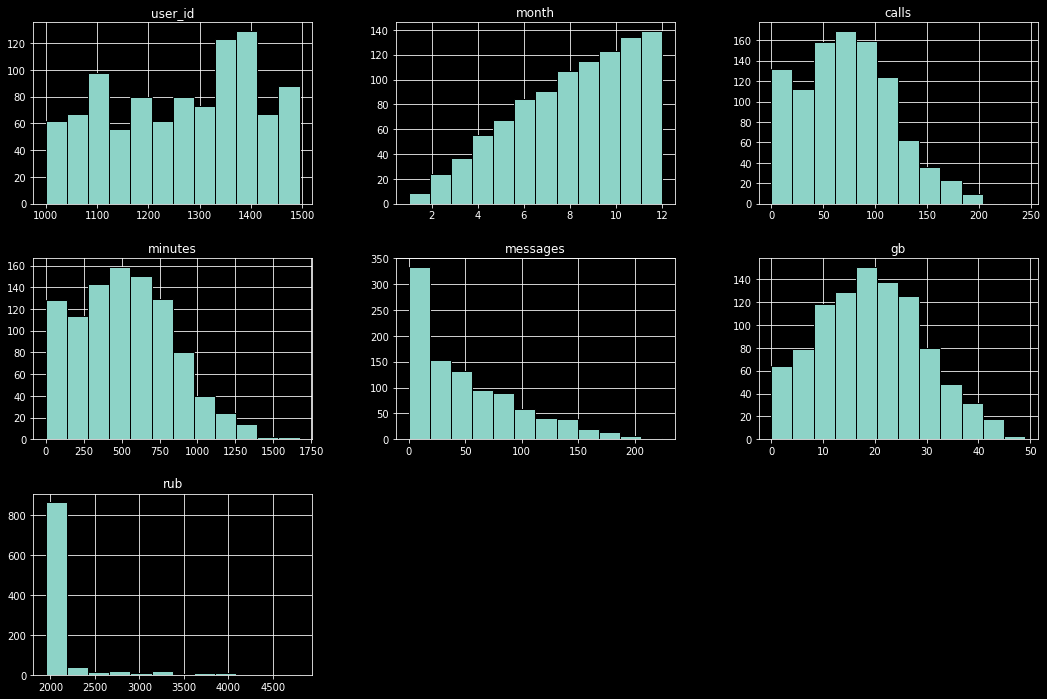

In [82]:
um_ultra.hist(bins=12, edgecolor='k', figsize=(18, 12));

In [83]:
um_ultra.describe()

,user_id,month,calls,minutes,messages,gb,rub
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,1263.094416,8.250761,73.392893,526.623350,49.363452,19.494416,2070.152284
std,140.694908,2.871762,43.916853,317.606098,47.804457,9.853511,376.187114
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,1143.000000,6.000000,41.000000,284.000000,6.000000,12.000000,1950.000000
50%,1277.000000,9.000000,74.000000,518.000000,38.000000,19.000000,1950.000000
75%,1381.000000,11.000000,104.000000,752.000000,79.000000,27.000000,1950.000000
max,1495.000000,12.000000,244.000000,1673.000000,224.000000,49.000000,4800.000000


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ⚠️</b>
    
Желательно выводить нужные строки, чтобы заказчику не пришлось искать средние и отклонения. </div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера  ❌</b>
    
Не хватает дисперсий для минут, смс и трафика.</div>

In [104]:
um_smart.loc[:, 'calls':'rub'].agg(['mean', 'var', 'std'])

,calls,minutes,messages,gb,rub
mean,58.463437,417.934948,33.384029,16.328847,1289.973531
var,672.876243,36219.315784,796.812958,33.028705,669785.708006
std,25.939858,190.313730,28.227876,5.747061,818.404367


In [105]:
um_ultra.loc[:, 'calls':'rub'].agg(['mean', 'var', 'std'])

,calls,minutes,messages,gb,rub
mean,73.392893,526.623350,49.363452,19.494416,2070.152284
var,1928.689990,100873.633397,2285.266143,97.091686,141516.745079
std,43.916853,317.606098,47.804457,9.853511,376.187114


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>Комментарий ревьюера 2 ✔️</h2>
    
Отлично. 

</div>

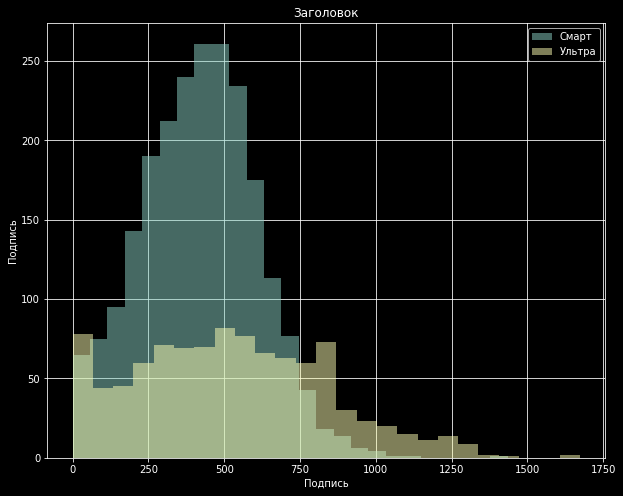

In [86]:
# КОД РЕВЬЮЕРА


um.groupby('tariff')['minutes'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Смарт', 'Ультра'])
plt.title('Заголовок')
plt.xlabel('Подпись')
plt.ylabel('Подпись')

plt.show()

### Звонки

Число звонков в тарифе Smart имеет близкое к нормальному распределение со средним 58 (1,9 звонка в день) и стандартным отклонением 26. Аналогичное распределение в тарифе Ultra имеет повышенную частотность вблизи нуля, среднее 73 (2,4 звонка в день), стандартное отклонение 44.

Количество израсходованных минут в тарифе Smart имеет близкое к нормальному распределение со средним 418 (14 минут в день) и стандартным отклонением 190. Аналогичное распределение в тарифе Ultra имеет повышенную частотность вблизи нуля, среднее 527 (18 минут в день), стандартное отклонение 318.

Похоже, что среди пользователей тарифа Ultra больше тех, кто не пользуется звонками, но те, кто ими пользуется, в среднем звонят больше, чем пользователи тарифа Smart.

### СМС

Число СМС в тарифе Smart имеет распределение, плотность которого монотонно убывает с пиком вблизи нуля, со средним 33 (1,1 СМС в день) и стандартным отклонением 28. Аналогичное распределение в тарифе Ultra имеет больший пик вблизи нуля, более длинный «хвост», среднее 49 (1,6 СМС в день) и стандартное отклонение 48.

Видим, что с СМС ситуация аналогична звонкам: среди пользователей тарифа Ultra больше тех, кто не пользуется СМС, но те, кто ими пользуется, в среднем делают это чаще, чем пользователи тарифа Smart.

### Интернет

Число использованных Гб в тарифе Smart имеет близкое к нормальному немного скошенное влево распределение со средним 16 и стандартным отклонением 6. Аналогичное распределение в тарифе Ultra более широкое, обрезано нулем, имеет среднее 19 и стандартное отклонение 10.

Пользователи тарифа Ultra в среднем используют несколько больше Гб, чем пользователи тарифа Smart, но разброс значений у них значительно выше.

### Расходы

Распределения ежемесячных расходов сильно отличаются у пользователей двух тарифов. У Smartовцев монотонно убывающее распределение с высоким пиком в районе абонентской платы 550 ₽, средним 1290 ₽ и стандартным отклонением 818 ₽. У Ultraвцев же распределение практически полностью состоит из пика в районе абонентской платы 1950 ₽ и небольшого числа выбросов в более высокие значения со средним 2070 ₽ и стандартным отклонением 376 ₽.

Получается, что подавляющему большинству пользователей тарифа Ultra *хватает* включенных в пакет минут, СМС и Гб, в то время как значительному числу пользователей тарифа Smart включенного в абонентскую плату пакета *не* хватает. 

## Проверка гипотез

Наконец, мы подошли к главной задаче проекта – проверке гипотез.

### Smart vs. Ultra

Сформулируем *двустороннюю* альтернативную гипотезу:
>средняя выручка от пользователей тарифов Ultra и Smart *различается*.

Тестируемая нулевая гипотеза будет звучать так: 
>средняя выручка от пользователей тарифов Ultra и Smart *не различается*.

Уровень значимости выберем стандартным: 5%. 

Выборки для каждого тарифа качественно отличаются и не зависят друг от друга, поэтому для тестирования используем t-тест для двух независимых выборок `scipy.stats.ttest_ind()`.

Выборки также отличаются размером и стандартным отклонением, поэтому параметру `equal_var` присваиваем значение `False`.

In [87]:
st.ttest_ind(um_smart['rub'], um_ultra['rub'], equal_var=False)

Ttest_indResult(statistic=-37.019021231454644, pvalue=4.2606313931076085e-250)

Мы получили фактически нулевое p-value. Это значит, что нулевую гипотезу можно смело отвергнуть в пользу альтернативной и с уверенностью сказать, что средняя выручка от пользователей тарифов Ultra и Smart *различается* при практически любом уровне значимости.

Более того, средняя выручка от пользователей тарифа Ultra *больше* средней выручки от пользователей тарифа Smart при практически любом уровне значимости. Это *односторонняя* альтернативная гипотеза, которую также нужно принять, отвергнув нулевую гипотезу, потому что для нее p-value будет вдвое ниже полученного.

### Moscow vs. Rest

Сохраним в отдельные датафреймы агрегированные результаты по Москве и всем остальным городам.

In [88]:
um_moscow = um.query("city == 'Москва'")
um_not_moscow = um.query("city != 'Москва'")

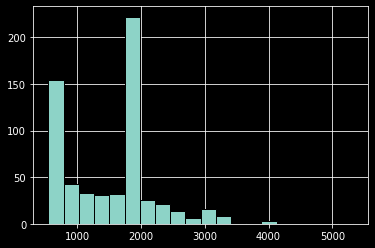

In [89]:
um_moscow['rub'].hist(bins=20, edgecolor='k');

In [90]:
um_moscow.describe()

,user_id,month,calls,minutes,messages,gb,rub
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,1268.872340,8.432079,65.436989,469.150573,37.877250,18.050736,1546.713584
std,137.530432,2.888057,33.186021,241.535044,37.160304,7.645788,752.088071
min,1001.000000,1.000000,0.000000,0.000000,0.000000,1.000000,550.000000
25%,1171.000000,6.000000,42.000000,304.000000,6.500000,13.000000,780.500000
50%,1291.000000,9.000000,64.000000,453.000000,29.000000,18.000000,1750.000000
75%,1385.000000,11.000000,85.500000,620.500000,57.000000,22.000000,1950.000000
max,1490.000000,12.000000,188.000000,1321.000000,191.000000,44.000000,5321.000000


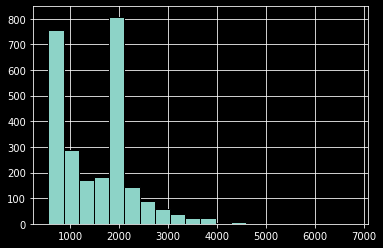

In [91]:
um_not_moscow['rub'].hist(bins=20, edgecolor='k');

In [92]:
um_not_moscow.describe()

,user_id,month,calls,minutes,messages,gb,rub
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000
mean,1247.533615,8.290434,62.475989,447.041875,38.376104,17.122551,1524.936227
std,146.011387,2.909368,33.229464,241.852152,35.913289,7.332184,808.787752
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1120.000000,6.000000,40.000000,280.500000,9.500000,13.000000,750.000000
50%,1241.000000,9.000000,62.000000,440.000000,30.000000,17.000000,1583.000000
75%,1377.000000,11.000000,82.000000,584.000000,57.000000,21.000000,1950.000000
max,1499.000000,12.000000,244.000000,1673.000000,224.000000,49.000000,6770.000000


В распределениях расходов видим характерные пики вблизи значений абонентской платы двух тарифов: 550 и 1950 ₽. Распределения далеки от нормального, но их средние значения и стандартные отклонения отличаются несильно.

Сформулируем *двустороннюю* альтернативную гипотезу:
>средняя выручка от пользователей из Москвы *отличается* от выручки от пользователей из других регионов.

Тестируемая нулевая гипотеза при этом будет звучать так: 
>средняя выручка от пользователей из Москвы *не отличается* от выручки от пользователей из других регионов.

Уровень значимости снова выберем стандартным: 5%. 

Две выборки отличаются по сути и не зависят друг от друга, поэтому для тестирования снова используем t-тест для двух независимых выборок `scipy.stats.ttest_ind()`.

Выборки также отличаются размером, поэтому параметру `equal_var` снова присваиваем значение `False`.

In [93]:
st.ttest_ind(um_moscow['rub'], um_not_moscow['rub'], equal_var=False)

Ttest_indResult(statistic=0.6347555055229303, pvalue=0.5257376663729298)

Полученное p-value 0,53 значительно превышает выбранный уровень значимости 0,05. Это значит, что мы *не можем* отвергнуть нулевую гипотезу в пользу альтернативной, т.е. средняя выручка от пользователей из Москвы *не отличается* от выручки от пользователей из других регионов при уровне значимости 5% или ниже. Рассчитаем среднюю выручку по всей выборке.

In [94]:
um['rub'].mean()

1529.0762289981333

Мы также *не можем* отвергнуть нулевую гипотезу в пользу *односторонней* альтернативной гипотезы: 
>средняя выручка от пользователей из Москвы *больше* выручки от пользователей из других регионов,

потому что для нее p-value будет вдвое ниже полученного – 0,26, но все равно выше выбранного уровня значимости 0,05.

## Выводы

- Выбока данных для анализа имеет явные признаки рукотворно сгенерированной, хоть и похожа на реальную в некоторых аспектах
- Среди пользователей тарифа Ultra больше тех, кто не пользуется звонками или СМС, но те, кто ими пользуется, в среднем делают это чаще, чем пользователи тарифа Smart
- Пользователи тарифа Ultra в среднем используют несколько больше Гб, чем пользователи тарифа Smart, но разброс значений у них значительно выше
- Подавляющему большинству пользователей тарифа Ultra *хватает* включенных в пакет минут, СМС и Гб, в то время как значительному числу пользователей тарифа Smart *не хватает* включенного в абонентскую плату пакета
- Средняя выручка от пользователей тарифа Ultra – 2070 ₽ – больше средней выручки от пользователей тарифа Smart – 1290 ₽ – при практически любом уровне значимости
- Средняя выручка от пользователей из Москвы *не отличается* от выручки от пользователей из других регионов при уровне значимости 5% или ниже и составляет 1529 ₽